In [1]:
import json
import itertools
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from scipy.stats.mstats import spearmanr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from importlib import reload

import warnings
warnings.filterwarnings('ignore')

In [5]:
reuters_full = pd.read_csv('./datasets_with_labels/reuters_reduced.csv', header=None)
df_data_full = tng_full.iloc[:, :-1]
df_labels_full = tng_full.iloc[:, -1]

In [11]:
reuters_tsne_embedding = pd.read_csv(
    './visualizations/data_embedded/reuters_tsne_embedding.csv', 
    header=None)
reuters_umap_embedding = pd.read_csv(
    './visualizations/data_embedded/reuters_umap_embedding.csv', 
    header=None)
reuters_pacmap_embedding = pd.read_csv(
    './visualizations/data_embedded/reuters_pacmap_embedding.csv', 
    header=None)
reuters_ivhd_euclidean_embedding = pd.read_csv(
    './ivhd_visualization_files/reuters_euclidean_visualization.txt', 
    header=None, 
    usecols=[0, 1])
reuters_ivhd_cosine_embedding = pd.read_csv(
    './ivhd_visualization_files/reuters_cosine_visualization.txt', 
    header=None,
    usecols=[0, 1])

In [16]:
import matplotlib.colors as colors
import matplotlib.cm as mplcm

In [23]:
def plot_2d_reuters_scatter(X, y, target_names, title, ax):
    cm = plt.get_cmap('gist_rainbow')
    cNorm  = colors.Normalize(vmin=0, vmax=23)
    scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
    ax.set_prop_cycle(color=[scalarMap.to_rgba(i) for i in range(24)])
    ax.set_xticks(())
    ax.set_yticks(())
    for i in y.unique():
        digit_indices = (y == i)
        dim0 = X[digit_indices, 0]
        dim1 = X[digit_indices, 1]
        ax.scatter(dim0, dim1, label=f"{target_names[i]}")
    plt.tight_layout()
    plt.legend()
    plt.title(title)

In [8]:
from sklearn.datasets import fetch_rcv1
reuters_original = fetch_rcv1(subset='test')
reuters_target_names = reuters_original.target_names

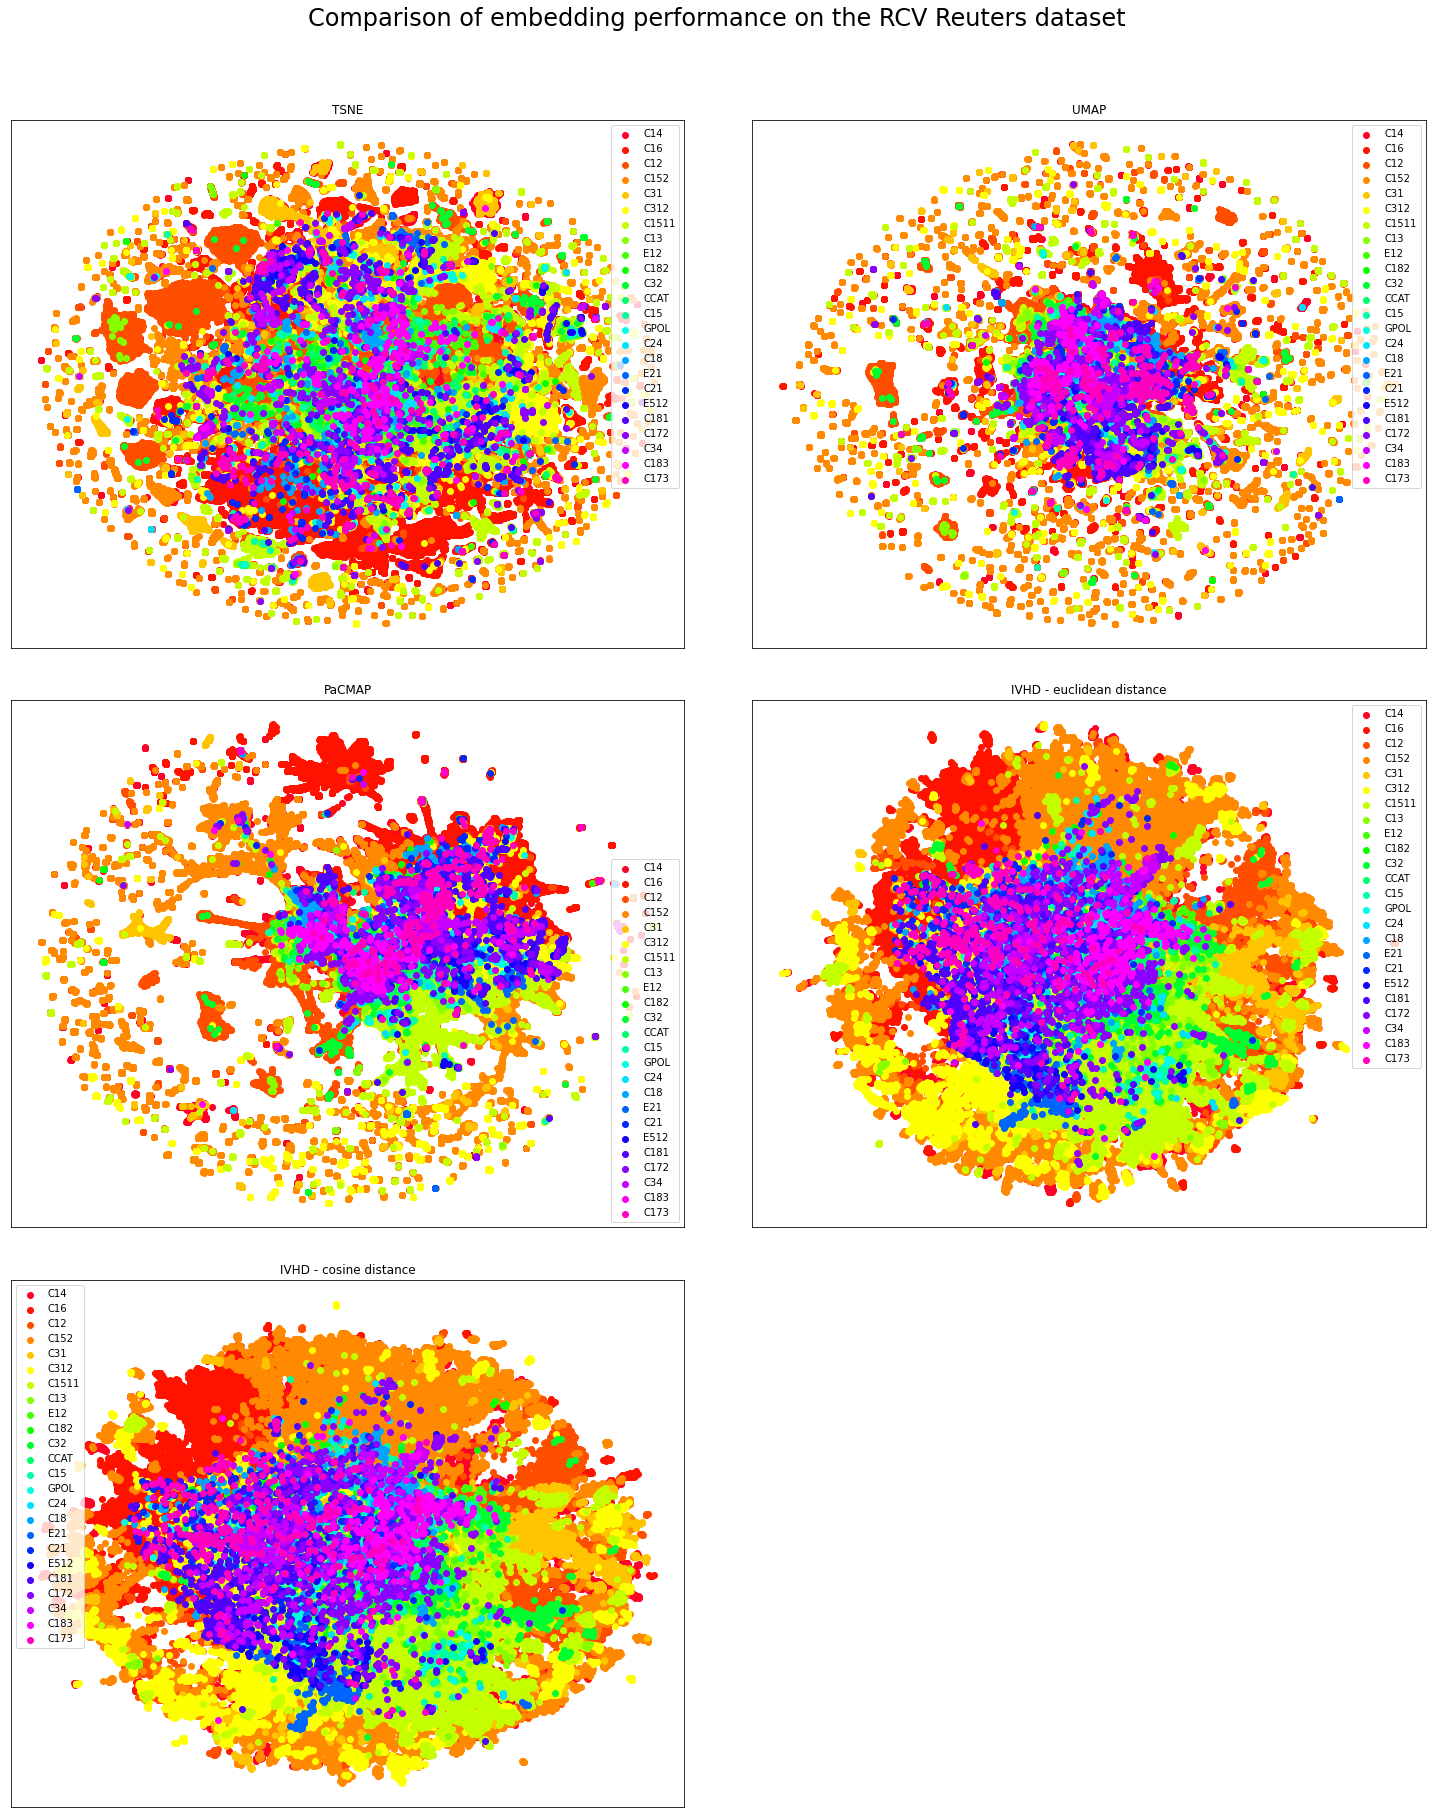

In [24]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
plot_2d_reuters_scatter(reuters_tsne_embedding.values, df_labels_full, reuters_target_names, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
plot_2d_reuters_scatter(reuters_umap_embedding.values, df_labels_full, reuters_target_names, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
plot_2d_reuters_scatter(reuters_pacmap_embedding.values, df_labels_full, reuters_target_names, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
plot_2d_reuters_scatter(reuters_ivhd_euclidean_embedding.values, df_labels_full, reuters_target_names, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
plot_2d_reuters_scatter(reuters_ivhd_cosine_embedding.values, df_labels_full, reuters_target_names, 'IVHD - cosine distance', ax20)

fig.suptitle('Comparison of embedding performance on the RCV Reuters dataset\n', size=24, y=1.05)
fig.subplots_adjust(wspace=0.1, hspace=0.1) 
plt.show()

In [25]:
fig.savefig("RCV-REUTERS-VISUALIZATIONS.png", transparent=True, facecolor='w')

In [26]:
random_embedding = np.random.rand(len(tng_full), 2)
df_random_embedding = pd.DataFrame(data=random_embedding)

## Based on co-rank matrix

In [27]:
import metrics.co_rank_matrix_based_metric 
reload(metrics.co_rank_matrix_based_metric)

from metrics.co_rank_matrix_based_metric import CoRankMatrixBasedMetric

In [28]:
random_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    df_random_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

tsne_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    reuters_tsne_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000],
)

umap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    reuters_umap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

pacmap_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    reuters_pacmap_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_euclidean_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    reuters_ivhd_euclidean_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

ivhd_cosine_embedding_cr_metric = CoRankMatrixBasedMetric(
    df_data_full.iloc[0:5000, :],
    reuters_ivhd_cosine_embedding.iloc[0:5000, :],
    df_labels_full.iloc[0:5000]
)

In [29]:
random_embedding_cr_metric_value = json.loads(random_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 69.07 seconds.


In [30]:
tsne_embedding_cr_metric_value = json.loads(tsne_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 67.65 seconds.


In [31]:
umap_embedding_cr_metric_value = json.loads(umap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 64.48 seconds.


In [32]:
pacmap_embedding_cr_metric_value = json.loads(pacmap_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 64.40 seconds.


In [33]:
ivhd_euclidean_embedding_cr_metric_value = json.loads(ivhd_euclidean_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 64.83 seconds.


In [34]:
ivhd_cosine_embedding_cr_metric_value = json.loads(ivhd_cosine_embedding_cr_metric.calculate())

CoRankMatrixBasedMetric calculation took 73.57 seconds.


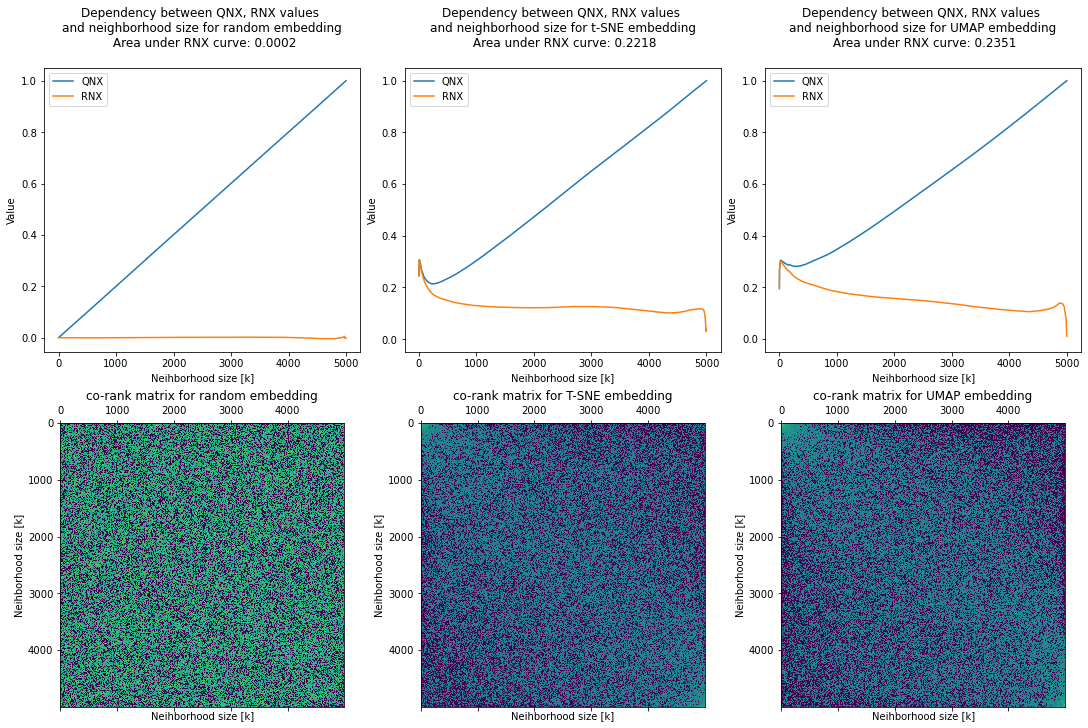

In [35]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for random embedding'
               f'\n Area under RNX curve: {random_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(random_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(random_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for t-SNE embedding'
               f'\n Area under RNX curve: {tsne_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(tsne_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(tsne_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for UMAP embedding'
               f'\n Area under RNX curve: {umap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(umap_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(umap_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for random embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(random_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for T-SNE embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(tsne_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for UMAP embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(umap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

In [36]:
fig.savefig("metrics_plots/RCV-Reuters-co-rank-matrix-part-1.png", transparent=True, facecolor='w')

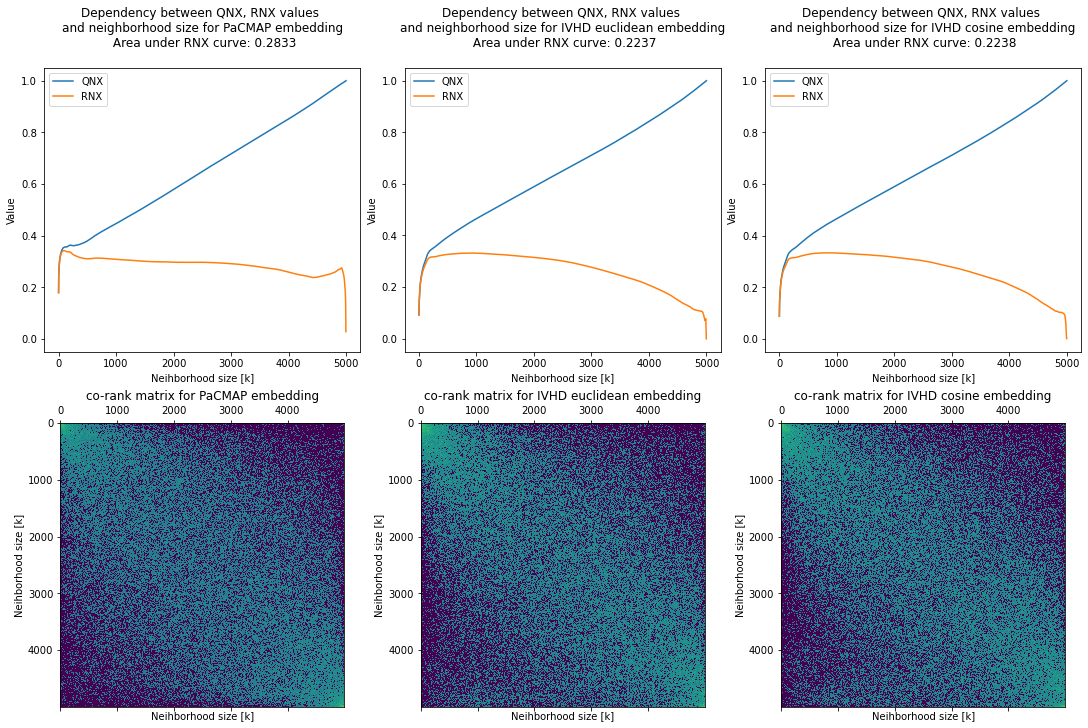

In [37]:
fig = plt.figure(figsize=(15, 10), constrained_layout=True)
spec = fig.add_gridspec(2, 3)

#=======================================================================================================

ax00 = fig.add_subplot(spec[0, 0])
ax00.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for PaCMAP embedding'
               f'\n Area under RNX curve: {pacmap_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax00.set_xlabel('Neihborhood size [k]')
ax00.set_ylabel('Value')
ax00.plot(pacmap_embedding_cr_metric_value['QNX'], label='QNX')
ax00.plot(pacmap_embedding_cr_metric_value['RNX'], label='RNX')
ax00.legend()


ax01 = fig.add_subplot(spec[0, 1])
ax01.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD euclidean embedding'
               f'\n Area under RNX curve: {ivhd_euclidean_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax01.set_xlabel('Neihborhood size [k]')
ax01.set_ylabel('Value')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['QNX'], label='QNX')
ax01.plot(ivhd_euclidean_embedding_cr_metric_value['RNX'], label='RNX')
ax01.legend()

ax02 = fig.add_subplot(spec[0, 2])
ax02.set_title(f'Dependency between QNX, RNX values \nand neighborhood size for IVHD cosine embedding'
               f'\n Area under RNX curve: {ivhd_cosine_embedding_cr_metric_value["AREA_UNDER_RNX_CURVE"]:.4f}\n')
ax02.set_xlabel('Neihborhood size [k]')
ax02.set_ylabel('Value')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['QNX'], label='QNX')
ax02.plot(ivhd_cosine_embedding_cr_metric_value['RNX'], label='RNX')
ax02.legend()

#=======================================================================================================

ax10 = fig.add_subplot(spec[1, 0])
ax10.set_title("co-rank matrix for PaCMAP embedding")
ax10.set_xlabel('Neihborhood size [k]')
ax10.set_ylabel('Neihborhood size [k]')
ax10.matshow(np.log(pacmap_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax11 = fig.add_subplot(spec[1, 1])
ax11.set_title("co-rank matrix for IVHD euclidean embedding")
ax11.set_xlabel('Neihborhood size [k]')
ax11.set_ylabel('Neihborhood size [k]')
ax11.matshow(np.log(ivhd_euclidean_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

ax12 = fig.add_subplot(spec[1, 2])
ax12.set_title("co-rank matrix for IVHD cosine embedding")
ax12.set_xlabel('Neihborhood size [k]')
ax12.set_ylabel('Neihborhood size [k]')
ax12.matshow(np.log(ivhd_cosine_embedding_cr_metric._co_rank_matrix+1e-2), cmap=plt.get_cmap('viridis'))

In [38]:
fig.savefig("metrics_plots/RCV-Reuters-co-rank-matrix-part-2.png", transparent=True, facecolor='w')

## Shepard's diagrams

In [39]:
from metrics.sheppards_diagram import ShepardDiagram

In [40]:
tsne_diagram = ShepardDiagram(df_data_full, reuters_tsne_embedding, df_labels_full)
umap_diagram = ShepardDiagram(df_data_full, reuters_umap_embedding, df_labels_full)
pacmap_diagram = ShepardDiagram(df_data_full, reuters_pacmap_embedding, df_labels_full)
ivhd_euclidean_diagram = ShepardDiagram(df_data_full, reuters_ivhd_euclidean_embedding, df_labels_full)
ivhd_cosine_diagram = ShepardDiagram(df_data_full, reuters_ivhd_cosine_embedding, df_labels_full)

In [41]:
tsne_diagram.calculate()
umap_diagram.calculate()
pacmap_diagram.calculate()
ivhd_euclidean_diagram.calculate()
ivhd_cosine_diagram.calculate()

ShepardDiagram calculation took 0.20 seconds.
ShepardDiagram calculation took 0.12 seconds.
ShepardDiagram calculation took 0.12 seconds.
ShepardDiagram calculation took 0.11 seconds.
ShepardDiagram calculation took 0.11 seconds.


In [42]:
def draw_diagram(x, y, title, ax):
    ax.scatter(x, y, alpha=0.2)
    ax.set_xlabel('Input distance')
    ax.set_ylabel('Output distance')
    plt.title(title)
    ax.grid()

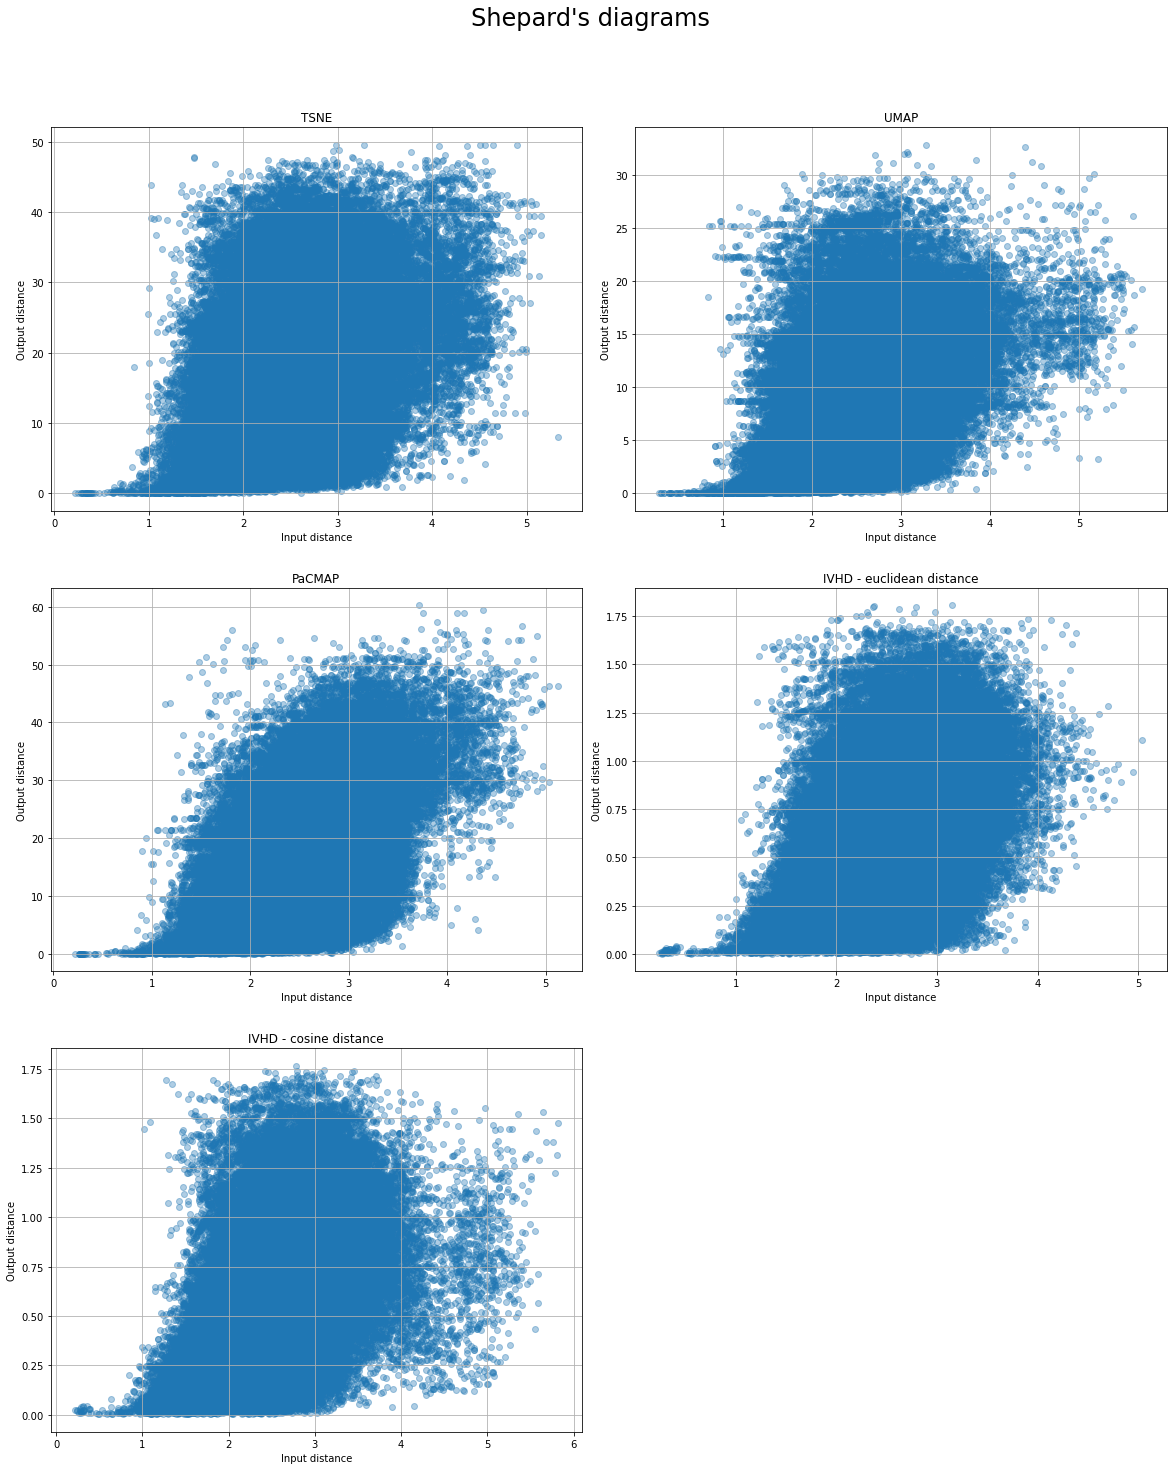

In [44]:
fig = plt.figure(figsize=(20, 24), constrained_layout=True)
spec = fig.add_gridspec(3, 2)

ax00 = fig.add_subplot(spec[0, 0])
draw_diagram(tsne_diagram.original_distances, tsne_diagram.embedding_distances, 'TSNE', ax00)
ax01 = fig.add_subplot(spec[0, 1])
draw_diagram(umap_diagram.original_distances, umap_diagram.embedding_distances, 'UMAP', ax01)
ax10 = fig.add_subplot(spec[1, 0])
draw_diagram(pacmap_diagram.original_distances, pacmap_diagram.embedding_distances, 'PaCMAP', ax10)
ax11 = fig.add_subplot(spec[1, 1])
draw_diagram(ivhd_euclidean_diagram.original_distances, ivhd_euclidean_diagram.embedding_distances, 'IVHD - euclidean distance', ax11)
ax20 = fig.add_subplot(spec[2, 0])
draw_diagram(ivhd_cosine_diagram.original_distances, ivhd_cosine_diagram.embedding_distances, 'IVHD - cosine distance', ax20)

fig.suptitle('Shepard\'s diagrams', size=24, y=0.95)
fig.subplots_adjust(wspace=0.1, hspace=0.2) 
plt.show()

In [45]:
fig.savefig("metrics_plots/RCV-Reuters-shepard-diagrams.png", transparent=True, facecolor='w')

## Thrustworthiness

In [46]:
from metrics.trustworthiness_based_metric import TrustworthinessBasedMetric

In [48]:
tsne_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], reuters_tsne_embedding.iloc[0:5000, :]
)

umap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], reuters_umap_embedding.iloc[0:5000, :]
)

isomap_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], reuters_pacmap_embedding.iloc[0:5000, :]
)

ivhd_euclidean_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], reuters_ivhd_euclidean_embedding.iloc[0:5000, :]
)

ivhd_cosine_embedding_thrst_metric = TrustworthinessBasedMetric(
    df_data_full.iloc[0:5000, :], reuters_ivhd_cosine_embedding.iloc[0:5000, :]
)

In [49]:
from pprint import pprint

In [51]:
pprint(tsne_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 36.27 seconds.
{'cosine': {'10': 0.892,
            '100': 0.741,
            '15': 0.868,
            '150': 0.714,
            '30': 0.821,
            '300': 1.305,
            '5': 0.922,
            '50': 0.788,
            '500': 1.057},
 'euclidean': {'10': 0.872,
               '100': 0.717,
               '15': 0.847,
               '150': 0.692,
               '30': 0.797,
               '300': 1.287,
               '5': 0.907,
               '50': 0.763,
               '500': 1.044}}


In [52]:
pprint(umap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 35.70 seconds.
{'cosine': {'10': 0.917,
            '100': 0.823,
            '15': 0.905,
            '150': 0.801,
            '30': 0.879,
            '300': 0.754,
            '5': 0.933,
            '50': 0.857,
            '500': 1.125},
 'euclidean': {'10': 0.896,
               '100': 0.793,
               '15': 0.883,
               '150': 0.772,
               '30': 0.853,
               '300': 0.726,
               '5': 0.915,
               '50': 0.828,
               '500': 1.102}}


In [53]:
pprint(pacmap_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 35.36 seconds.
{'cosine': {'10': 0.945,
            '100': 0.904,
            '15': 0.94,
            '150': 0.89,
            '30': 0.93,
            '300': 0.857,
            '5': 0.951,
            '50': 0.923,
            '500': 0.83},
 'euclidean': {'10': 0.926,
               '100': 0.876,
               '15': 0.919,
               '150': 0.86,
               '30': 0.907,
               '300': 0.826,
               '5': 0.935,
               '50': 0.897,
               '500': 0.802}}


In [54]:
pprint(ivhd_euclidean_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 35.82 seconds.
{'cosine': {'10': 0.879,
            '100': 0.861,
            '15': 0.877,
            '150': 0.857,
            '30': 0.874,
            '300': 0.837,
            '5': 0.884,
            '50': 0.87,
            '500': 0.822},
 'euclidean': {'10': 0.856,
               '100': 0.834,
               '15': 0.854,
               '150': 0.83,
               '30': 0.85,
               '300': 0.806,
               '5': 0.862,
               '50': 0.845,
               '500': 1.197}}


In [55]:
pprint(ivhd_cosine_embedding_thrst_metric.calculate())

TrustworthinessBasedMetric calculation took 35.42 seconds.
{'cosine': {'10': 0.88,
            '100': 0.862,
            '15': 0.878,
            '150': 0.858,
            '30': 0.874,
            '300': 0.838,
            '5': 0.884,
            '50': 0.87,
            '500': 0.823},
 'euclidean': {'10': 0.858,
               '100': 0.834,
               '15': 0.855,
               '150': 0.83,
               '30': 0.85,
               '300': 0.805,
               '5': 0.864,
               '50': 0.845,
               '500': 1.197}}


## Distance Matrix based

In [56]:
from metrics.distance_matrix_based_metric import DistanceMatrixBasedMetric

In [67]:
tsne_embedding_dm_metric = DistanceMatrixBasedMetric(
    reuters_tsne_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

umap_embedding_dm_metric = DistanceMatrixBasedMetric(
    reuters_umap_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

pacmap_embedding_dm_metric = DistanceMatrixBasedMetric(
    reuters_pacmap_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

ivhd_euclidean_embedding_dm_metric = DistanceMatrixBasedMetric(
    reuters_ivhd_euclidean_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

ivhd_cosine_embedding_dm_metric = DistanceMatrixBasedMetric(
    reuters_ivhd_cosine_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

In [68]:
tsne_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 30.54 seconds.


0.8043262438132226

In [69]:
umap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 30.34 seconds.


0.6500038841918444

In [70]:
pacmap_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 30.72 seconds.


0.6135792106537318

In [71]:
ivhd_euclidean_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 31.01 seconds.


0.5514819933447942

In [72]:
ivhd_cosine_embedding_dm_metric.calculate()

DistanceMatrixBasedMetric calculation took 30.79 seconds.


0.5480888527889153

## Distance Matrix and KMeans based

In [74]:
from metrics.distance_matrix_and_kmeans_based_metric import DistanceMatrixAndKMeansBasedMetric

In [75]:
tsne_embedding_dmkmenas_metric = DistanceMatrixAndKMeansBasedMetric(
    reuters_tsne_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

umap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    reuters_umap_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

pacmap_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    reuters_pacmap_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

ivhd_euclidean_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    reuters_ivhd_euclidean_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

ivhd_cosine_embedding_dmkmeans_metric = DistanceMatrixAndKMeansBasedMetric(
    reuters_ivhd_cosine_embedding.iloc[0:50_000, :], df_labels_full.iloc[0:50_000]
)

In [ ]:
tsne_embedding_dmkmenas_metric.calculate()

In [ ]:
umap_embedding_dmkmeans_metric.calculate()

In [ ]:
pacmap_embedding_dmkmeans_metric.calculate()

In [ ]:
ivhd_euclidean_embedding_dmkmeans_metric.calculate()

In [ ]:
ivhd_cosine_embedding_dmkmeans_metric.calculate()

## KNN gain and DR quality

In [ ]:
from metrics.knn_gain_and_dr_quality import LocalMetric

local_metrics_reuters = LocalMetric()

In [ ]:
local_metrics_reuters.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_tsne_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='tsne')

In [ ]:
local_metrics_reuters.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_umap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='umap')

In [ ]:
local_metrics_reuters.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_pacmap_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='pacmap')

In [ ]:
local_metrics_reuters.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_ivhd_euclidean_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd euclidean')

In [ ]:
local_metrics_reuters.calculate_knn_gain_and_dr_quality(
    X_lds=reuters_ivhd_cosine_embedding, 
    X_hds=df_data_full,
    labels=np.array(df_labels_full.astype(str).astype(int)),
    method_name='ivhd cosine')

In [ ]:
local_metrics_mnist.visualize()